## ICS 483 HW 2 Code

Name: Jessie Flores
<br>
Date: 09/25/19

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as img

img1 = img.open('hw2_images/landsat.jpg').convert('L')


In [2]:
# Problem 5

# 5a

def get_histogram(gray_image, n_bins):
    
    histogram = np.zeros(n_bins)
    
    for i in gray_image:
        histogram[i] += 1
    
    return histogram

def my_hist_equalization(gray_image, n_bins):
    
    image_array = np.asarray(gray_image)
    flat = image_array.flatten()
    
    image_histogram = get_histogram(flat, n_bins)

    # Sum values in histogram
    image_histogram = iter(image_histogram)
    value = [next(image_histogram)]
    for i in image_histogram:
        value.append(value[-1] + i)
    cum_sum = np.array(value)
    
    # Normalize cumulative sum values
    numerator = (cum_sum - cum_sum.min()) * 255
    denominator = cum_sum.max() - cum_sum.min()

    cum_sum = numerator / denominator
    cum_sum = cum_sum.astype('uint8')
    new_image = cum_sum[flat]
    
    return np.reshape(new_image, image_array.shape)


equalized_image = my_hist_equalization(img1, 256)


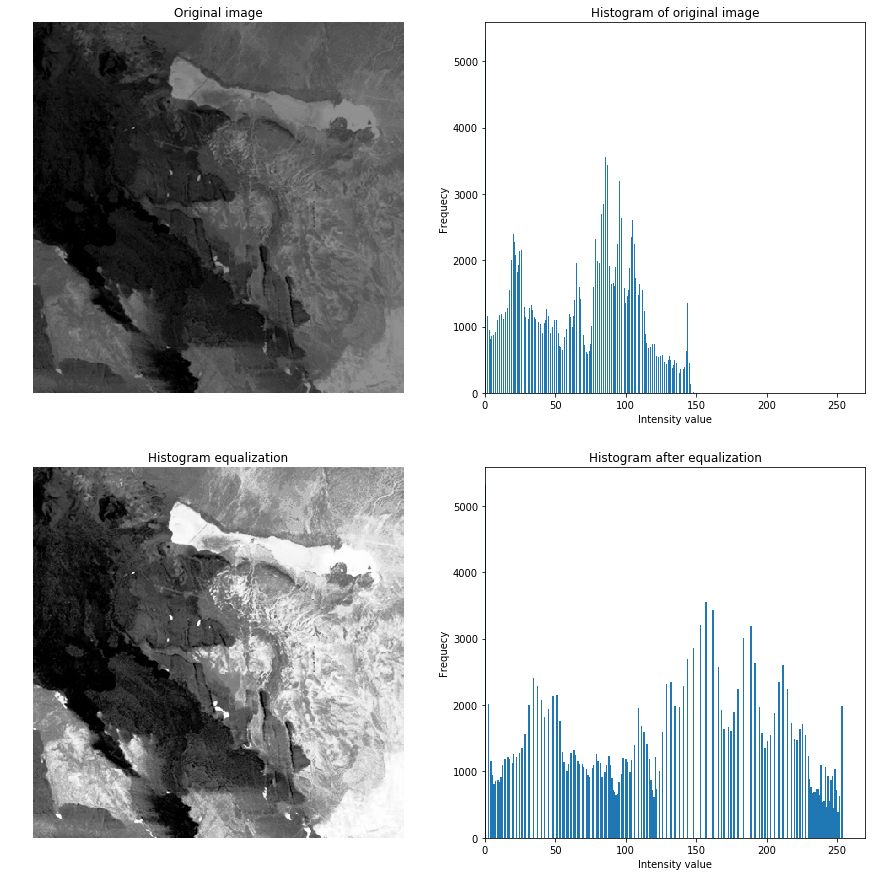

In [3]:
# 5b

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(2,2,2)
plt.hist(np.asarray(img1).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram of original image")

# display the new image
fig.add_subplot(2,2,3)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Histogram equalization")

fig.add_subplot(2,2,4)
plt.hist(np.asarray(equalized_image).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram after equalization")

# 5c
plt.savefig("landsat_hist_equalized.png") 
plt.show()


In [4]:
# Problem 6

# 6a

def contrast_stretch(gray_image):
    original_min = gray_image.getextrema()[0]
    original_max = gray_image.getextrema()[1]
    new_min = 0
    new_max = 255
    return gray_image.point(lambda a: (a-original_min)*(((new_max-new_min)/(original_max-original_min))+new_min))

image_stretch = contrast_stretch(img1)


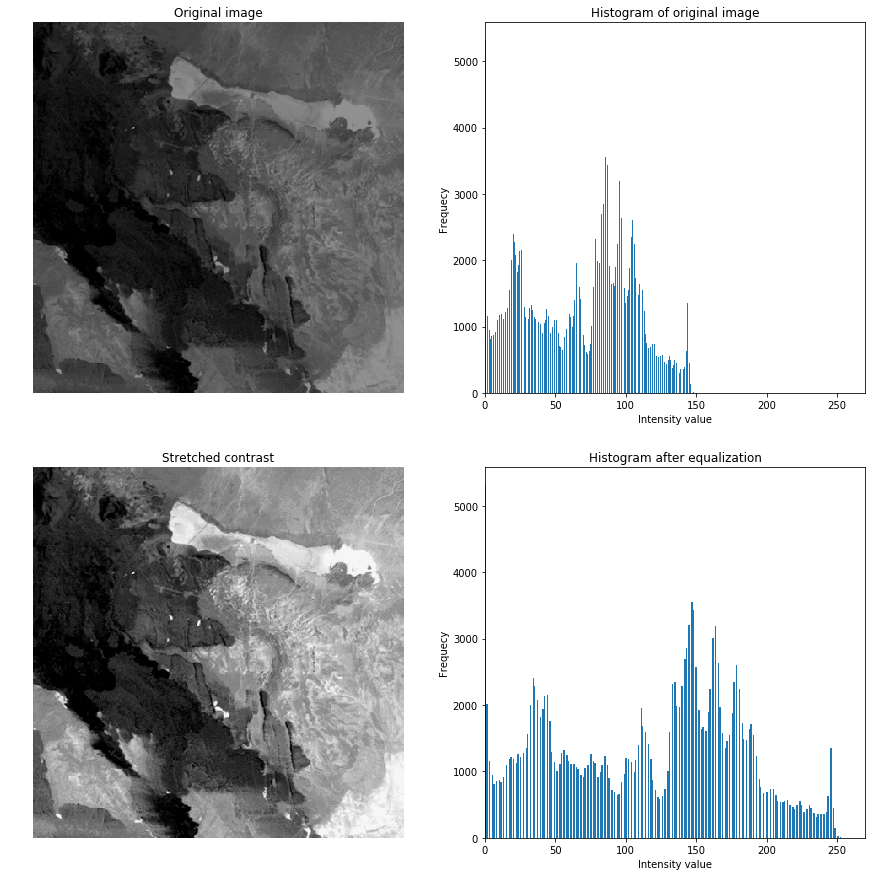

In [5]:
# 6b

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(2,2,2)
plt.hist(np.asarray(img1).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram of original image")

# display the new image
fig.add_subplot(2,2,3)
plt.imshow(image_stretch, cmap='gray')
plt.axis('off')
plt.title("Stretched contrast")

fig.add_subplot(2,2,4)
plt.hist(np.asarray(image_stretch).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram after equalization")

# 6c
plt.savefig("landsat_stretched.png") 
plt.show()


### Comparison analysis (6b)
<br>
The resulting stretched contrast image is a litte different from the histogram equalized version. They both
give more lighting and enable the viewer to see the edges of the various continents better. The histogram equalized
version however, gives stronger white pixels whereas the stretched contrast does not.

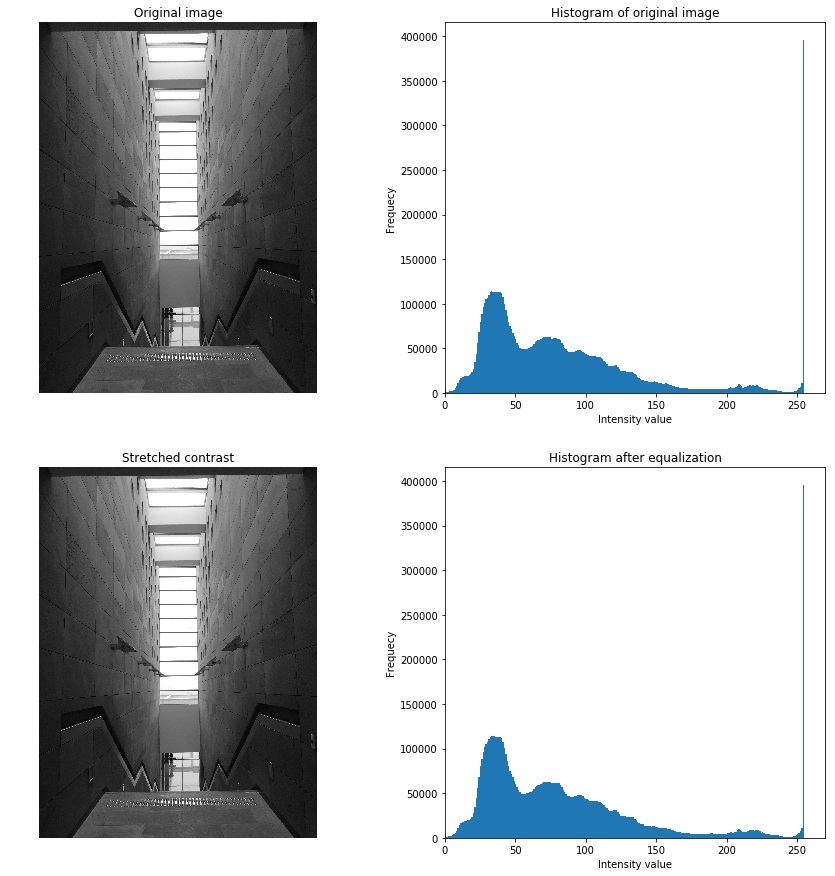

In [8]:
# 6d

img2 = img.open('hw2_images/wall_gray.jpg')

image_stretch2 = contrast_stretch(img2)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(2,2,2)
plt.hist(np.asarray(img2).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram of original image")

# display the new image
fig.add_subplot(2,2,3)
plt.imshow(image_stretch2, cmap='gray')
plt.axis('off')
plt.title("Stretched contrast")

fig.add_subplot(2,2,4)
plt.hist(np.asarray(image_stretch2).flatten(), bins=256)
plt.xlim([0, 270])
plt.xlabel("Intensity value")
plt.ylabel("Frequecy")
plt.title("Histogram after equalization")

# 6e
plt.savefig("wall_gray_stretched.png") 
plt.show()


### Comparison analysis (6e)
<br>
The stretched contrast is hardly any different from the original image because the original image already had high 
intensity values. The scaling ratio would thus be close to unit value and contrast would hardly change the image.

In [16]:
# Problem 7

# 7a

from skimage import io
import numpy as np

def my_convolution2d(gray_image, h):
    
    image_rows, image_columns = gray_image.shape
    h_rows, h_columns = h.shape
    center_filter_row = h_rows//2
    center_filter_column = h_columns//2
    new_image = np.zeros(gray_image.shape, dtype=np.uint8)
    
    for i in range(0,image_rows):
        for j in range(0,image_columns):
            for m in range(0, h_rows):
                flipped_row = h_rows - 1 - m
                for n in range(0, h_columns):
                    flipped_column = h_columns - 1 - n
                    
                    ii = i + (center_filter_row - flipped_row)
                    jj = j + (center_filter_column - flipped_column)
                    
                    # Boundary cases
                    if ii >= 0 and ii < image_rows and jj >= 0 and jj < image_columns: 
                        new_image[i][j] += int(gray_image[ii][jj] * h[flipped_row][flipped_column])
                        
    return new_image
                        


In [17]:
# 7b

# note: running this cell may take a long time
import scipy as sp

img3 = io.imread("hw2_images/conv_test.jpg")

n = 3

box_shape = (n, n)
filter = np.ones(box_shape)
box_filter = filter / (n*n) 
im_conv_3x3 = my_convolution2d(img3, box_filter)
io.imsave("conv_test_box3x3.jpg", im_conv_3x3)

n = 9

box_shape = (n, n)
filter = np.ones(box_shape)
box_filter = filter / (n*n) 
im_conv_9x9 = my_convolution2d(img3, box_filter)
io.imsave("conv_test_box9x9.jpg", im_conv_9x9)

n = 15

box_shape = (n, n)
filter = np.ones(box_shape)
box_filter = filter / (n*n) 
im_conv_15x15 = my_convolution2d(img3, box_filter)
io.imsave("conv_test_box15x15.jpg", im_conv_15x15)

# 1x13, 13x1 box filters

box_shape = (1, 13)
filter = np.ones(box_shape)
box_filter = filter / 13 
im_conv_1x13 = my_convolution2d(img3, box_filter)
io.imsave("conv_test_box1x13.jpg", im_conv_1x13)

box_shape = (13, 1)
filter = np.ones(box_shape)
box_filter = filter / 13 
im_conv_13x1 = my_convolution2d(img3, box_filter)
io.imsave("conv_test_box13x1.jpg", im_conv_13x1)


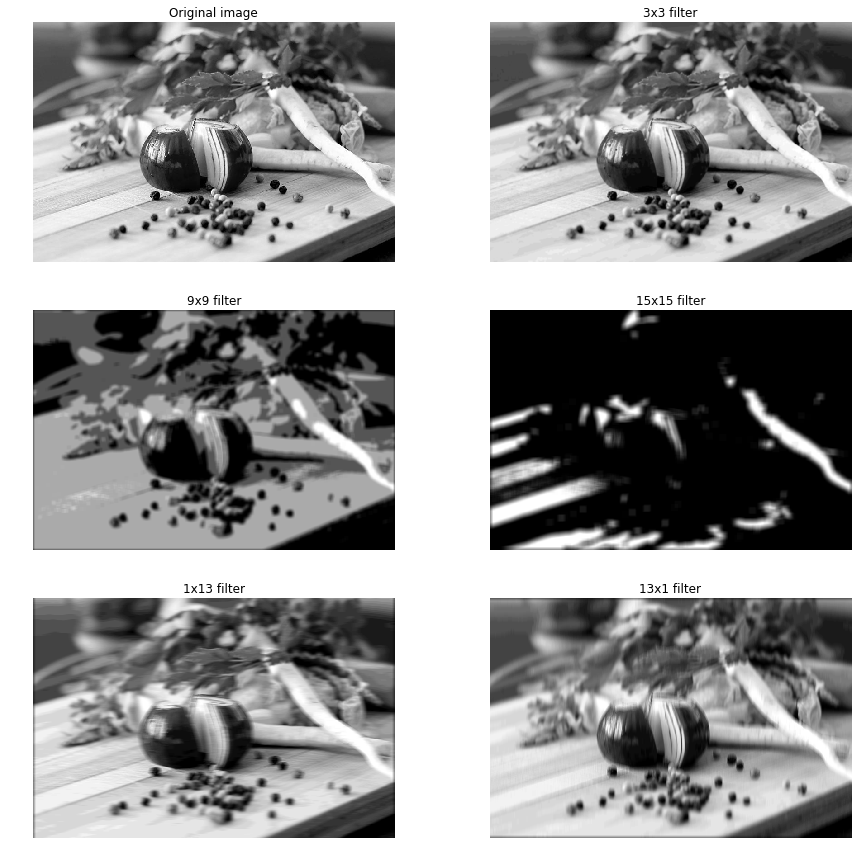

In [18]:
# Plotting

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(3,2,1)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title("Original image")

fig.add_subplot(3,2,2)
plt.imshow(im_conv_3x3, cmap='gray')
plt.axis('off')
plt.title("3x3 filter")

fig.add_subplot(3,2,3)
plt.imshow(im_conv_9x9, cmap='gray')
plt.axis('off')
plt.title("9x9 filter")

fig.add_subplot(3,2,4)
plt.imshow(im_conv_15x15, cmap='gray')
plt.axis('off')
plt.title("15x15 filter")

fig.add_subplot(3,2,5)
plt.imshow(im_conv_1x13, cmap='gray')
plt.axis('off')
plt.title("1x13 filter")

fig.add_subplot(3,2,6)
plt.imshow(im_conv_13x1, cmap='gray')
plt.axis('off')
plt.title("13x1 filter")

plt.show()

### Comparison Analysis (7b)

The smaller filter sizes yields similar values to the original picture. As the filter size increases, there is a greater shadow effect to the image. The 1x13 and 13x1 box filters yield a type of blurred effect.

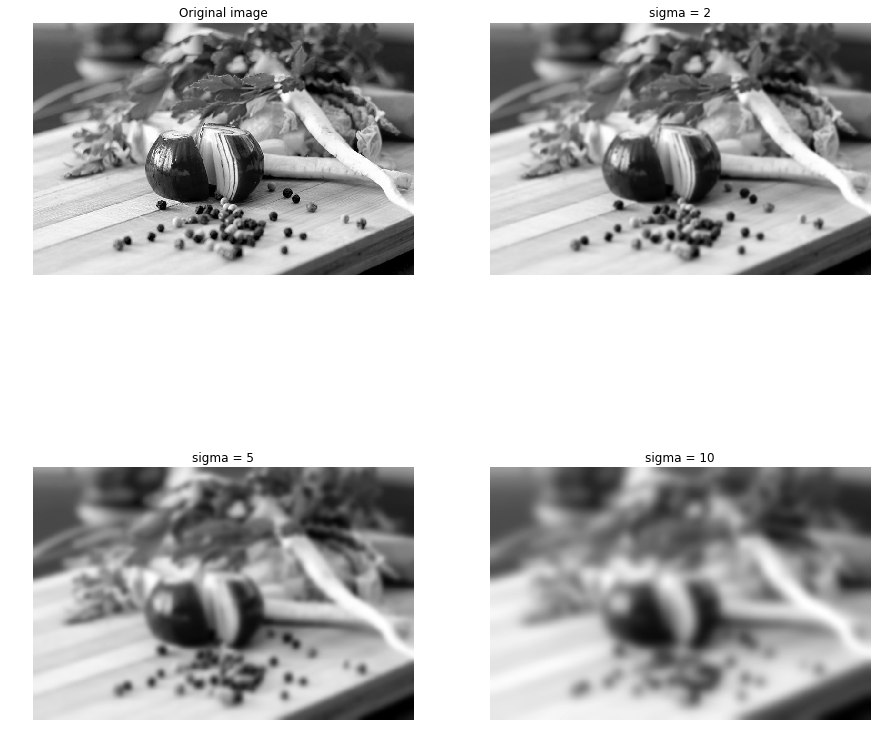

In [19]:
# 7c

img3 = io.imread("hw2_images/conv_test.jpg")

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
i = 1
fig.add_subplot(2,2,i)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title("Original image")

for sigma in [2, 5, 10]:
    
    convolved_image = sp.ndimage.gaussian_filter(img3, sigma)
    file_name = 'conv_test_gauss_s%s.jpg' % sigma
    io.imsave(file_name, convolved_image)
    
    i += 1
    fig.add_subplot(2,2,i)
    plt.imshow(convolved_image, cmap='gray')
    plt.axis('off')
    plot_title = 'sigma = %s' % sigma
    plt.title(plot_title)
    
plt.show()